In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# netflix data 불러오기

In [7]:
csv_path = os.getenv("HOME") + "/aiffel/Netflix/data/netflix_titles.csv"
data = pd.read_csv(csv_path)
data_copy=data.copy()
df = pd.DataFrame(data)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
# 날짜 숫자로 바꿔주기
df['date_added'] = pd.to_datetime(df['date_added'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

# netflix 주가&거래량 데이터 불러오기

In [10]:
csv_path = os.getenv("HOME") + "/aiffel/Netflix/data/netflix_stockprice.csv"
data2 = pd.read_csv(csv_path)
data2_copy=data2.copy()
df2 = pd.DataFrame(data2)
df2


,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [15]:
df2['Date'] = pd.to_datetime(df2['Date'])
# 해줘야 됨

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4881 non-null   datetime64[ns]
 1   High       4881 non-null   float64       
 2   Low        4881 non-null   float64       
 3   Open       4881 non-null   float64       
 4   Close      4881 non-null   float64       
 5   Volume     4881 non-null   float64       
 6   Adj Close  4881 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 267.1 KB


# dtype 맞춰 주고 데이터 합치기

In [18]:
df_INNER = pd.merge(df, df2, left_on='date_added', right_on='Date', how='inner')
df_INNER

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,High,Low,Open,Close,Volume,Adj Close
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,592.979980,583.640015,592.500000,592.390015,2126200.0,592.390015
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,592.979980,583.640015,592.500000,592.390015,2126200.0,592.390015
2,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,592.979980,583.640015,592.500000,592.390015,2126200.0,592.390015
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,592.979980,583.640015,592.500000,592.390015,2126200.0,592.390015
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,592.979980,583.640015,592.500000,592.390015,2126200.0,592.390015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,s8729,Movie,When Two Worlds Collide,"Heidi Brandenburg, Mathew Orzel",NaN,"Peru, United States, United Kingdom",2016-11-30,2016,TV-14,103 min,"Documentaries, International Movies",This documentary takes a hard look at how indi...,2016-11-30,120.370003,116.389999,119.000000,117.000000,7715100.0,117.000000
6791,s8732,Movie,While We're Young,Noah Baumbach,"Ben Stiller, Naomi Watts, Adam Driver, Amanda ...",United States,2017-10-23,2015,R,97 min,"Comedies, Dramas, Independent Movies",A documentary filmmaker struggling with a crea...,2017-10-23,194.899994,191.029999,194.169998,192.470001,6980000.0,192.470001
6792,s8777,Movie,Yellowbird,Christian De Vita,"Dakota Fanning, Seth Green, Christine Baranski...","France, Belgium",2015-08-05,2014,PG,90 min,"Children & Family Movies, Comedies",An orphaned bird tags along with a flock on th...,2015-08-05,129.289993,122.709999,125.620003,123.709999,26946500.0,123.709999
6793,s8778,Movie,Yes or No,Saratswadee Wongsomphet,"Sushar Manaying, Supanart Jittaleela, Arisara ...",Thailand,2018-12-06,2010,TV-PG,111 min,"International Movies, LGBTQ Movies, Romantic M...",Traditional girl Pie is initially uncomfortabl...,2018-12-06,283.220001,267.140015,268.329987,282.880005,13074300.0,282.880005


In [20]:
len(df_INNER)

6795

In [24]:
print(df.columns)
print(df2.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


<AxesSubplot:xlabel='Date', ylabel='Volume'>

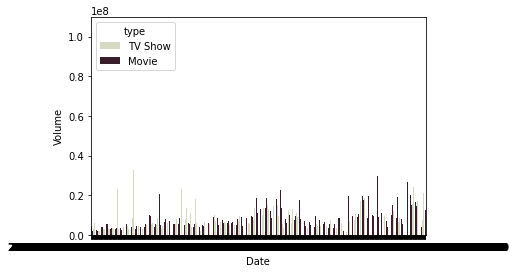

In [30]:
sns.barplot(data=df_INNER, x='Date', y='Volume', hue='type', palette='ch:.50')
# sns.pointplot, lineplot도 있음

<AxesSubplot:xlabel='Date', ylabel='Volume'>

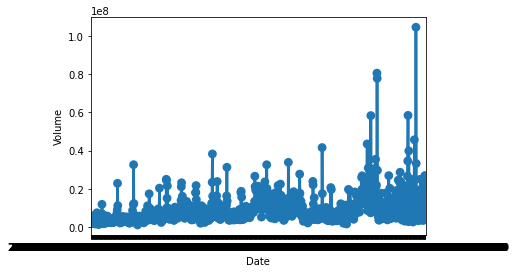

In [31]:
sns.pointplot(data=df_INNER, x='Date', y='Volume')

<AxesSubplot:xlabel='Date', ylabel='Volume'>

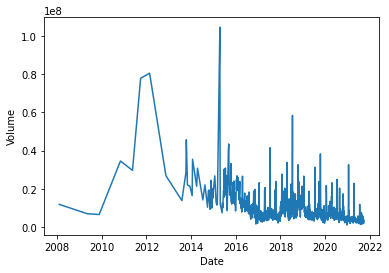

In [32]:
sns.lineplot(data=df_INNER, x='Date', y='Volume', )

<AxesSubplot:xlabel='date_added', ylabel='release_year'>

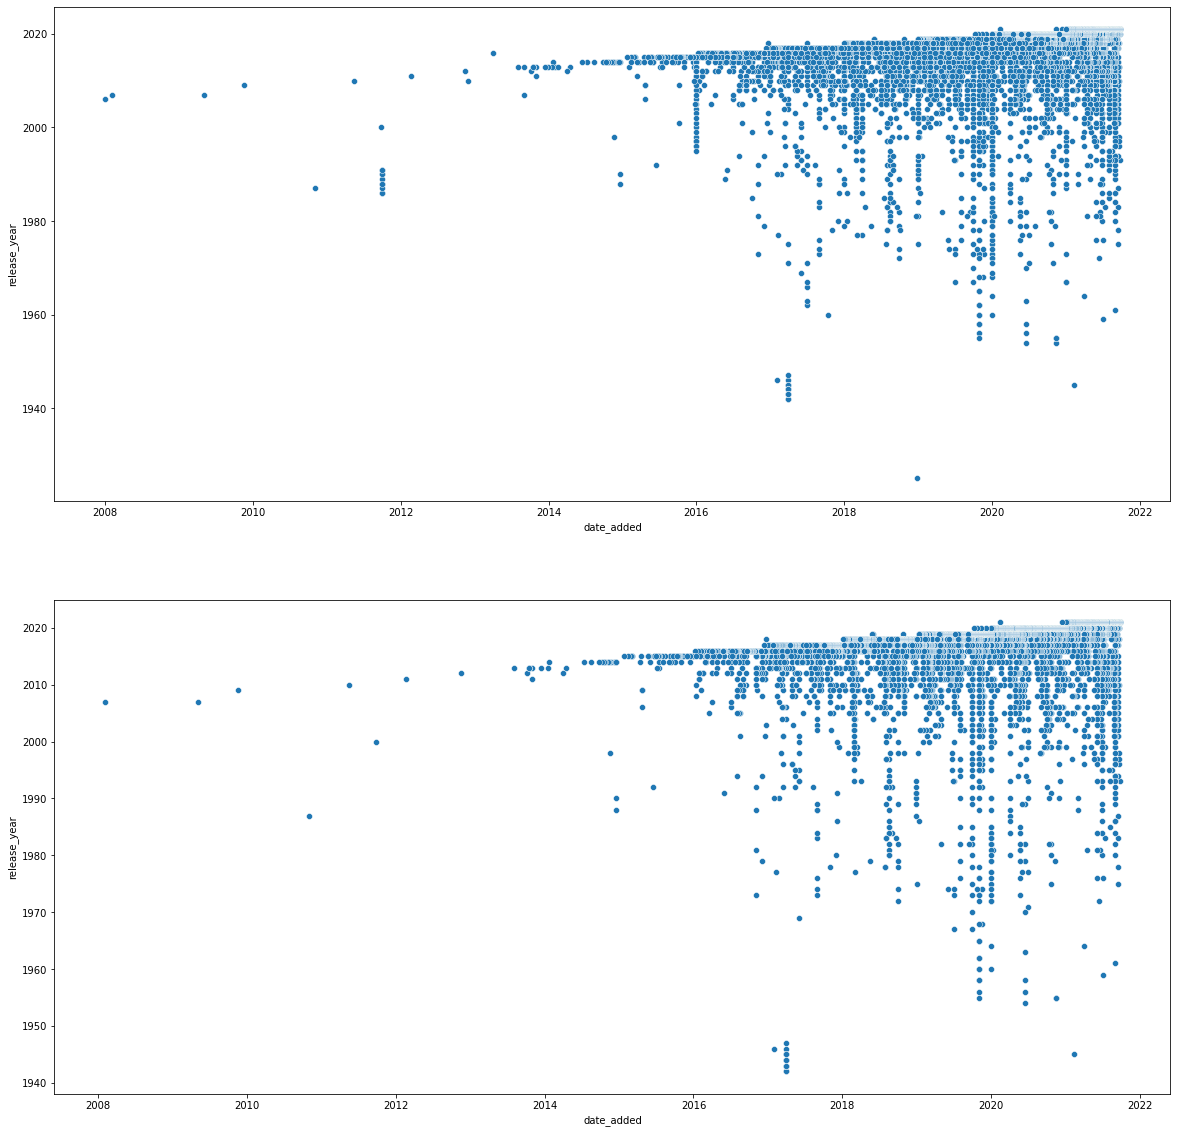

In [78]:
plt.figure(figsize = (20, 20))
plt.subplot(2,1,1)
sns.scatterplot(x='date_added', y='release_year', data=df)

plt.subplot(2,1,2)
sns.scatterplot(x='date_added', y='release_year', data=df_INNER)

#주가와 상관관계 (16년, 19년, 20년)

--> 처음에는 최신물만 취급하다가 점점 복고 컨텐츠로 확장


그래프 한번에 여러개 그리기 (여러 축)
https://pbj0812.tistory.com/451


# 추가된 컨텐츠 발매연도 - 주가 관계

Text(0, 0.5, 'Stock Price')

<Figure size 7200x3600 with 0 Axes>

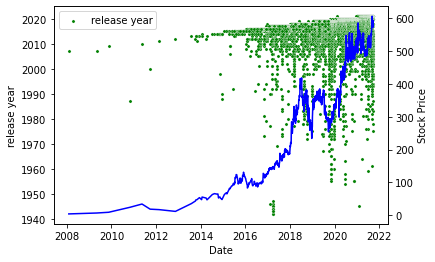

In [113]:
plt.figure(figsize = (100, 50))
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_INNER, x = 'Date', y = 'release_year', color = 'g', s=10)
c2 = sns.lineplot(ax = axe2, data = df_INNER, x = 'Date', y = 'Adj Close', color = 'b')

axe1.legend(['release year','Stock Price'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('release year')
axe2.set_ylabel('Stock Price')

--> 복고 컨텐츠 밀도가 높은 구간에서 주가가 급상승, 밀도가 낮은 구간에서 조정 (최신 컨텐츠를 추구하는 한국 문화와 반대)


# type별 주가 추이

<Figure size 7200x3600 with 0 Axes>

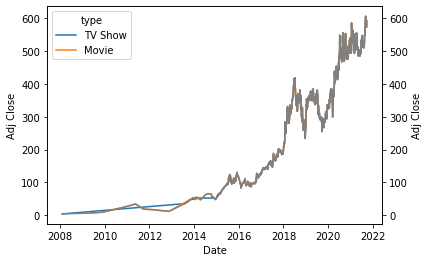

In [120]:
plt.figure(figsize = (100, 50))
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

c1 = sns.lineplot(ax = axe1, data = df_INNER, x = 'Date', y = 'Adj Close', hue='type')
c2 = sns.lineplot(ax = axe2, data = df_INNER, x = 'Date', y = 'Adj Close', color = 'gray')


--> 대체로 Movie에 따라감, 초반 빼고는 별 차이가 없음


# 추가된 컨텐츠 발매연도 - 거래량 관계

Text(0, 0.5, 'Volume')

<Figure size 7200x3600 with 0 Axes>

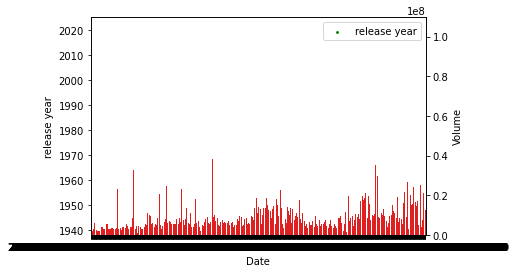

In [125]:
plt.figure(figsize = (100, 50))
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

c1 = sns.scatterplot(ax = axe1, data = df_INNER, x = 'Date', y = 'release_year', color = 'g', s=10)
c2 = sns.barplot(ax = axe2, data = df_INNER, x = 'Date', y = 'Volume', color = 'r')

axe1.legend(['release year','Volume'])

#plt.legend(bbox_to_anchor=(1.03, 1), loc=2) #legend 그래프 밖에 추가하기인데 안 먹힘

axe1.set_ylabel('release year')
axe2.set_ylabel('Volume')

--> 안 찍힘? 발매연도 대신 평점, 주제(description sentiment 분석)와의 관계도 봐야함 + 거래량 대신 실적과도 + 디즈니 등 다른 곳 영화들도 (복고 등) + 평 좋은 영화 감독/배우 몇명 집어서 주가.거래량.실적과 비교(흥행보증수표)

S&P 500 등 평균그래프도

실제 뉴스, 리포트와 비교(전략, 성공요인 맞는지) + 그래프 미화

넷플릭스 : 양은 많은데 질이 떨어진다
디즈니 : 질은 좋은데 양이 없다

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """Entry point for launching an IPython kernel.


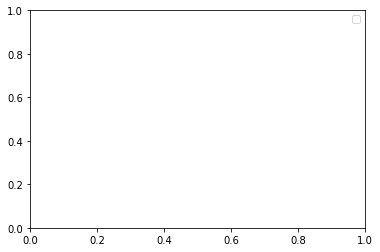

In [126]:
plt.legend('a', 'b')

# 평점 netflix_imdb 불러오기

In [129]:
csv_path = os.getenv("HOME") + "/aiffel/Netflix/data/netflix_imdb.csv"
data3 = pd.read_csv(csv_path)
data3_copy=data3.copy()
df3 = pd.DataFrame(data3)
df3.head()


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


제목 띄어쓰기 제거 후 합치기


https://cheris8.github.io/python/PY-Remove-Whitespace/

--> 안됨??

In [137]:
df_INNER['title'].str.strip()


0                 Blood & Water
1                     Ganglands
2         Jailbirds New Orleans
3                  Kota Factory
4                 Midnight Mass
                 ...           
6790    When Two Worlds Collide
6791          While We're Young
6792                 Yellowbird
6793                  Yes or No
6794                    Zinzana
Name: title, Length: 6795, dtype: object

In [ ]:
l